## Reading the dataset

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import ipywidgets as widgets
from IPython.display import display, clear_output

In [25]:
file_path = 'API_SP.POP.TOTL_DS2_en_csv_v2_438206.csv'
df = pd.read_csv(file_path, skiprows=4)

df.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0,NaN,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0,NaN,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0,NaN,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0,NaN,NaN
265,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,3806310.0,3925952.0,4049778.0,4177931.0,4310332.0,4447149.0,...,14154937.0,14452704.0,14751101.0,15052184.0,15354608.0,15669666.0,15993524.0,16320537.0,NaN,NaN


In [26]:
df = df.drop(columns=['2023', 'Unnamed: 68'])

## Plot to get top 10 poppulation groups from 2020

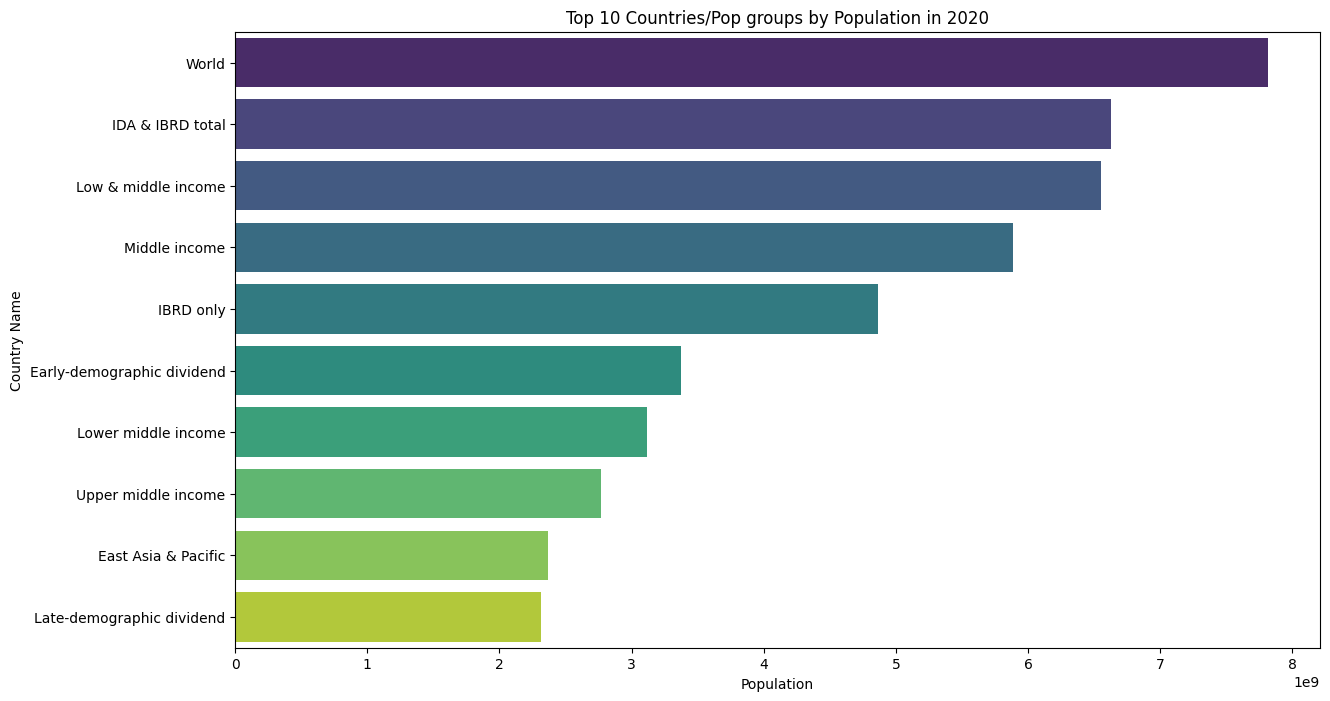

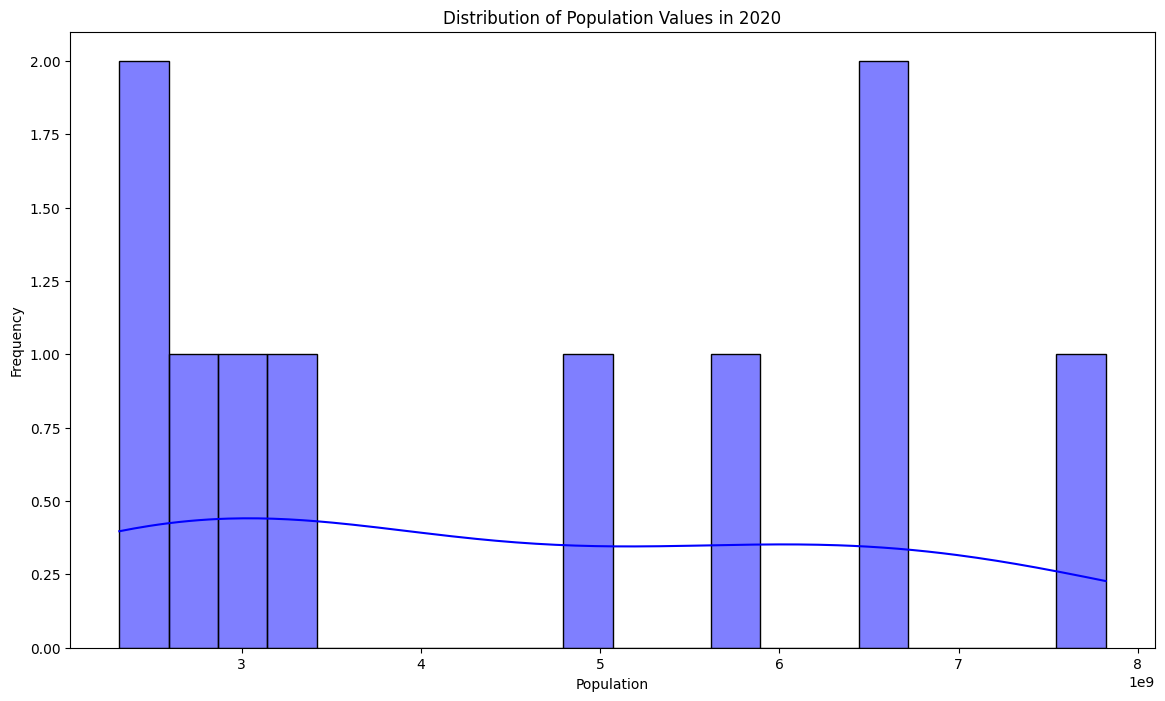

In [27]:
df_countries = df[df['Country Code'].str.match('^[A-Z]{3}$', na=False)]

# Melting the DataFrame to have 'Year' as a variable column
df_melted = df_countries.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                              var_name='Year', value_name='Population')

# Converting 'Year' to numeric, ignoring errors for non-year columns
df_melted['Year'] = pd.to_numeric(df_melted['Year'], errors='coerce')

# Dropping rows with NaN values in 'Population' or 'Year'
df_melted.dropna(subset=['Population', 'Year'], inplace=True)

# Filtering for a specific year, e.g., 2020
df_2020 = df_melted[df_melted['Year'] == 2020].sort_values('Population', ascending=False).head(10)

# Bar chart for top 10 countries by population in 2020
plt.figure(figsize=(14, 8))
sns.barplot(x='Population', y='Country Name', data=df_2020, palette='viridis')
plt.title('Top 10 Countries/Pop groups by Population in 2020')
plt.xlabel('Population')
plt.ylabel('Country Name')
plt.show()

# Histogram of population values for 2020
plt.figure(figsize=(14, 8))
sns.histplot(df_2020['Population'], bins=20, kde=True, color='blue')
plt.title('Distribution of Population Values in 2020')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

In [30]:
df_pakistan = df[df['Country Name'] == 'Pakistan'].drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])

# Convert column names to integers (assuming they represent years)
df_pakistan.columns = df_pakistan.columns.astype(int)

# Define the range slider using valid year columns
year_slider = widgets.IntRangeSlider(
    value=[df_pakistan.columns.min(), df_pakistan.columns.max()],
    min=df_pakistan.columns.min(),
    max=df_pakistan.columns.max(),
    step=1,
    description='Year Range:',
    continuous_update=False
)

# Function to create the initial plot
def create_plot():
    fig = go.FigureWidget()
    fig.add_bar(x=[], y=[], marker=dict(color=[]))
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Population',
        title={
            'text': 'Population of Pakistan',
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        width=1200,  # The width of the figure
        height=600,  # The height of the figure
        transition={'duration': 500},  # Set the transition duration in milliseconds
    )
    return fig


fig = create_plot()

# Function to update the plot based on the selected range
def update_plot(year_range):
    start_year, end_year = year_range
    filtered_data = df_pakistan.loc[:, start_year:end_year]
    filtered_data = filtered_data.transpose().reset_index()
    filtered_data.columns = ['Year', 'Population']
    
    with fig.batch_update():
        fig.data[0].x = filtered_data['Year']
        fig.data[0].y = filtered_data['Population']
        fig.data[0].marker.color = filtered_data['Year']
        fig.data[0].marker.colorscale = 'Viridis'  # Set the colorscale to 'Viridis'
        fig.layout.title.text = f'Population of Pakistan from {start_year} to {end_year}'
        fig.layout.transition = {'duration': 500}  # Set the transition duration in milliseconds

# Create the interactive plot
interactive_plot = widgets.interactive(update_plot, year_range=year_slider)

# Display the plot and the slider
display(fig)
display(interactive_plot)


FigureWidget({
    'data': [{'marker': {'color': array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
                                         1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
                                         1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
                                         1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
                                         2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
                                         2020, 2021, 2022]),
                         'colorscale': [[0.0, '#440154'], [0.1111111111111111,
                                        '#482878'], [0.2222222222222222,
                                        '#3e4989'], [0.3333333333333333,
                                        '#31688e'], [0.4444444444444444,
                                        '#26828e'], [0.555555

interactive(children=(IntRangeSlider(value=(1960, 2022), continuous_update=False, description='Year Range:', m…